# Gold Price Prediction
For this analysis, we will be using data from kaggle to predict the gold prices

Problem Statement: Our objective is to predict the cost of gold prices using machine learning regression model

Importing the Libraries

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 

from sklearn.ensemble import RandomForestRegressor 

from sklearn import metrics 

Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')

In [3]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gold_data.shape

# shape is used to find the dimension of the data i.e., how many rows and columns we have in our data set
# as the output tells we have 2290 rows and 6 columns of data

(2290, 6)

In [6]:
# getting some basic informations about the data
gold_data.info()

# here .inof() function tells us about the general info about our data
# column names, if we have any null values and what is the type of that column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking the number of missing values
print(gold_data.isnull())

# Here we are checking if our data contains null values or not
# and we do that using .isnull() function now this function returns True or False as output

print('Getting count of null values: \n',gold_data.isnull().sum())
# in order to get the sum of missing values we in turn use .sum() function to get the total number of missing values
# in this case we don't have any missing values

       Date    SPX    GLD    USO    SLV  EUR/USD
0     False  False  False  False  False    False
1     False  False  False  False  False    False
2     False  False  False  False  False    False
3     False  False  False  False  False    False
4     False  False  False  False  False    False
...     ...    ...    ...    ...    ...      ...
2285  False  False  False  False  False    False
2286  False  False  False  False  False    False
2287  False  False  False  False  False    False
2288  False  False  False  False  False    False
2289  False  False  False  False  False    False

[2290 rows x 6 columns]
Getting count of null values: 
 Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64


In [8]:
# getting the statistical measures of the data
gold_data.describe()

# describe function gives us the descriptive summary of the data
# such as, what is the total count of data 
# as we know we have 2290 rows in total hence the first row tells us that
# next what is the respective mean, standard devation, min value of that particular column, max value etc etc
# You will get a idea of this if ou do it manually, in case you have any doubts 
# Mai toh hu he  :P

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation: Value ranges between [-1,1]
1. Positive Correlation
2. Negative Correlation

# Next important step is correlation
Why correlation is important?
One value can have a positive or negative impact on the other value
In such cases our analysis might be misleading
Hence we should always check correlation

A positive correlation means that this linear relationship is positive, and the two variables increase or decrease in the same direction. A negative correlation is just the opposite, wherein the relationship line has a negative slope and the variables change in opposite directions (i.e, one variable decreases while the other increases). No correlation simply means that the variables behave very differently and thus, have no linear relationship.

Example: temperature and ice cream sales: the hotter the day, the higher the ice cream sales. This is a positive correlation.

Rain is negatively correlated to bicycle traffic. 



In [9]:
correlation = gold_data.corr()

In [10]:
import matplotlib.pyplot as plt
plt.show()

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


<AxesSubplot:>

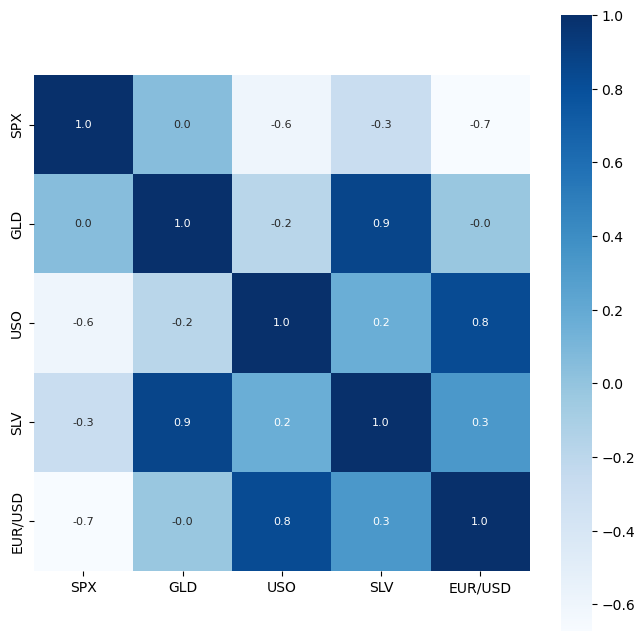

In [12]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [13]:
# correlation values of GLD
print(correlation['GLD'])

# so from this we can infer that Gold and silver are positively correlated

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

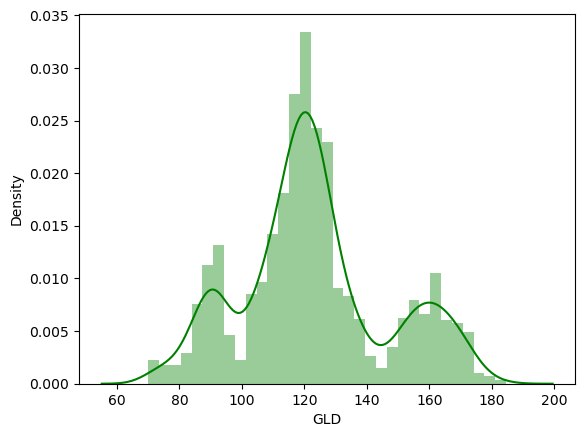

In [14]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [15]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [17]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

Model Training:
Random Forest Regressor

In [18]:
# Here we are defining a RandomForestRegressor and n_estimators is the total number of decision tress we are using
# here since our data is less we are using 100 decision trees to train our model on
regressor = RandomForestRegressor(n_estimators=100)

In [19]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [20]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [21]:
print(test_data_prediction)

[168.91899965  81.77749976 115.96240027 127.28650104 120.496402
 154.62939782 150.89450063 126.16880014 117.77679882 126.02490075
 116.26770081 172.23110095 142.22249949 167.75169859 115.24829946
 117.63620025 138.3430037  170.47700185 160.0711033  162.14660002
 155.12350031 125.88790023 175.13869962 157.12740253 125.04280115
  94.04919904  76.9051     120.18419982 119.34540092 167.4646003
  88.45149878 125.18960137  90.98800071 117.75759978 121.17879909
 136.82840077 115.47040093 117.03530054 147.97749868 106.98780106
 103.79660182  87.36059778 126.55570056 117.67579903 153.54319918
 119.81480039 108.29680127 107.93769811  93.21479991 127.2004977
  74.73180016 113.60209913 121.06989989 111.08009916 118.8214985
 120.21659986 159.1435006  167.16810179 146.8703972   86.31619965
  94.24389975  86.91019863  90.61709998 118.98150114 126.50430065
 127.85879986 171.53110024 122.20979958 117.28289902  99.36029956
 167.93440173 142.87849786 132.12620224 121.04540209 120.67859954
 119.73930082 1

In [27]:
# R squared 
r2_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared : ", r2_score)

# r2_score (coefficient of determination) regression score function. Best possible score is 1.0

R squared :  0.9900565188790901


Compare the Actual Values and Predicted Values in a Plot

In [22]:
Y_test = list(Y_test)

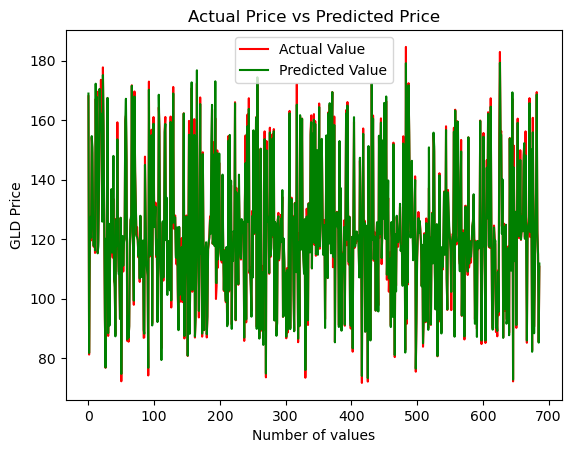

In [23]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()